In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

# Creando set de datos

In [42]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
X, Y = gaussian_quantiles

In [43]:
Y = Y[:, np.newaxis]

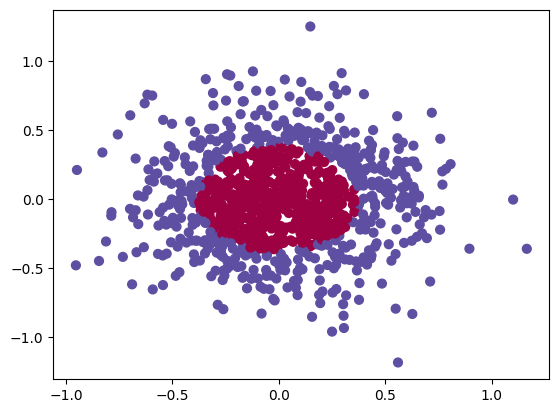

In [44]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

# Funciones de activacion

In [45]:
def sigmoid(x, derivate = False):
  if derivate:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
  if derivate:
    x[x<=0] = 0
    x[x>0] = 1
    return x
  else:
    return np.maximum(0, x)

# Funcion de perdida

In [66]:
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

# Funcion de inicializacion de parametros

In [47]:
def initialize_paremeter_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0, L-1):
    parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) - 1
    parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) - 1
  return parameters

In [48]:
layer_dims = [2,4,8,1]
params = initialize_paremeter_deep(layer_dims)

In [49]:
params

{'W1': array([[ 0.83877848,  0.43886049, -0.98183645, -0.09617875],
        [ 0.11988798,  0.26107315, -0.86564465, -0.6508581 ]]),
 'b1': array([[-0.28794955,  0.97746932, -0.29411278,  0.24712109]]),
 'W2': array([[ 0.01866076, -0.58258071,  0.54202224, -0.43333657, -0.29995891,
         -0.29812288, -0.12910138,  0.4883931 ],
        [-0.32269349,  0.1388208 ,  0.36441231, -0.01260911,  0.63239551,
          0.8295425 , -0.45459182, -0.09324085],
        [ 0.77121982, -0.95906081,  0.7715252 ,  0.73326351,  0.77022388,
          0.57358252, -0.02720595,  0.26987639],
        [-0.07405313, -0.71984325,  0.95658358,  0.07484544, -0.97773304,
         -0.92804717,  0.99975799, -0.69803387]]),
 'b2': array([[-0.73447946, -0.75320064, -0.49028552,  0.30385306, -0.29188531,
          0.57301952, -0.20850461,  0.39112   ]]),
 'W3': array([[ 0.62580905],
        [-0.55243276],
        [ 0.0357269 ],
        [ 0.33029508],
        [-0.87113741],
        [-0.1109558 ],
        [-0.46507064],


In [50]:
params['W1'].shape

(2, 4)

In [51]:
X.shape

(1000, 2)

In [52]:
np.matmul(X,params['W1']).shape

(1000, 4)

In [53]:
X@params['W1']

array([[ 0.16977469,  0.1021203 , -0.24733604, -0.06216222],
       [ 0.15222544,  0.02768995,  0.01180551,  0.14943544],
       [-0.19359119, -0.00041891, -0.14225325, -0.30181033],
       ...,
       [ 0.37277946,  0.18420811, -0.39673673, -0.00794076],
       [ 0.15652625,  0.04138053, -0.03506368,  0.11219459],
       [-0.08102524, -0.0405604 ,  0.08814116,  0.00340256]])

# Funcion de entrenamiento

In [58]:
def train(x_data, lr, params, training = True):
  ## Forward
  params['A0'] = x_data

  params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
  params['A1'] = relu(params['Z1'])

  params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
  params['A2'] = relu(params['Z2'])

  params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']
  if training:
    ## Backpropagation
    params['dZ3'] = mse(Y,output,True) * sigmoid(params['A3'],True)
    params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

    params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
    params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

    params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
    params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

    ## Gadient descent
    params['W3'] = params['W3'] - params['dW3'] * lr
    params['b3'] = params['b3'] - (np.mean(params['dW3'],axis=0,keepdims=True) * lr)

    params['W2'] = params['W2'] - params['dW2'] * lr
    params['b2'] = params['b2'] - (np.mean(params['dW2'],axis=0,keepdims=True) * lr)

    params['W1'] = params['W1'] - params['dW1'] * lr
    params['b1'] = params['b1'] - (np.mean(params['dW1'],axis=0,keepdims=True) * lr)
  return output

In [61]:
layer_dims = [2,4,8,1]
params = initialize_paremeter_deep(layer_dims)
errors = []
for _ in range(80000):
  output = train(X, 0.00001, params)
  if _ % 25 == 0:
    print(mse(Y,output))
    errors.append(mse(Y,output))

0.2569283930653915
0.2563248842764719
0.25574030885615373
0.2551627106657764
0.2545843305464249
0.2540036626870828
0.2534284738614823
0.25285751856119965
0.25229864805911506
0.2517543144566596
0.2512243198938919
0.25071611787920073
0.2502131245253983
0.24972143723060414
0.24923551504547897
0.24875691930361274
0.24828706632285302
0.24783424852760674
0.24739053217026
0.2469593438187118
0.2465475038732792
0.24614965822056115
0.24576299909358373
0.24539892227056415
0.24505086870665752
0.24472029977109627
0.24440447498581497
0.24409944489267843
0.24380966449390473
0.2435379395773276
0.24328436685240679
0.2430449078823455
0.24282111956476318
0.2426161329930904
0.2424356688118674
0.24227001876655063
0.2421200019152248
0.24198240565745197
0.24185559890758698
0.2417369546769826
0.2416241890236406
0.24151653007129398
0.24141334475633175
0.24131450277368577
0.2412205096324282
0.24113005358344802
0.2410429570862665
0.24095773825029232
0.2408724574473394
0.24078756385232214
0.24070324684232655
0.24

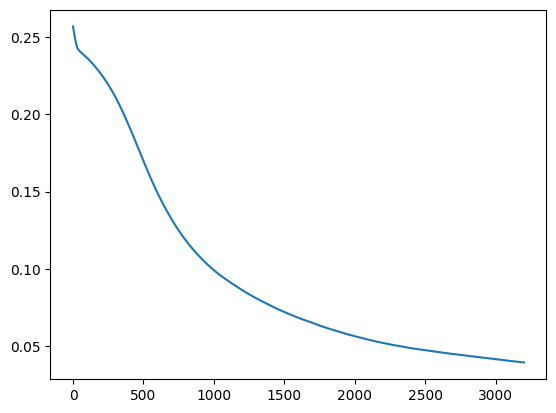

In [62]:
plt.plot(errors)

In [63]:
data_test = (np.random.rand(1000,2) * 2) - 1
y = train(data_test,0.0001,params, training=False)

In [64]:
y = np.where(y >= 0.5,1, 0)

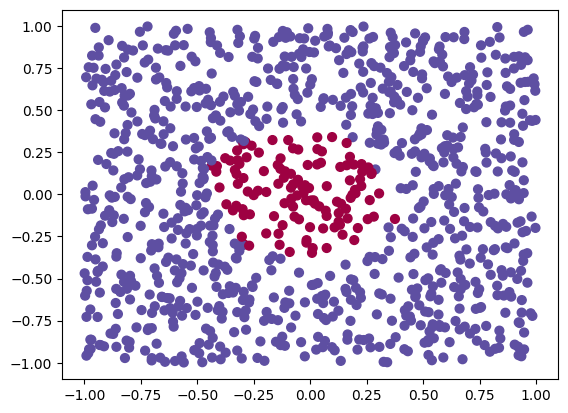

In [65]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)